In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Research Papers/XAI/Data/Dataset_Without_Lagged_Variables.csv")

In [4]:
df

,STATE,YEAR,real GDP(in billion U.S. dollars),ENROLL,TOTAL_EXPENDITURE,PER_CAPITA_EXPENDITURE,INSTRUCTION_EXPENDITURE_RATIO,SUPPORT_SERVICES_EXPENDITURE_RATIO,CAPITAL_OUTLAY_EXPENDITURE_RATIO
0,Alabama,2000,157.22,730184,5003267,6.852063,0.510009,0.263638,0.132694
1,Alabama,2001,156.85,728532,5086045,6.981224,0.522291,0.270203,0.106229
2,Alabama,2002,160.42,726367,5147821,7.087080,0.528522,0.274795,0.096380
3,Alabama,2003,165.13,727900,5298932,7.279753,0.531638,0.287126,0.081579
4,Alabama,2004,176.63,730418,5450269,7.461849,0.527606,0.290014,0.082495
...,...,...,...,...,...,...,...,...,...
845,Wyoming,2012,38.86,89994,1670728,18.564882,0.506247,0.323518,0.127636
846,Wyoming,2013,38.85,91533,1675477,18.304622,0.505451,0.326129,0.127677
847,Wyoming,2014,39.56,92732,1775999,19.151954,0.487575,0.312929,0.162149
848,Wyoming,2015,40.42,93867,1942406,20.693172,0.461237,0.291128,0.210782


In [5]:
# Define features (X) and target (y)
X = df[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
          "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
          "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y = df["real GDP(in billion U.S. dollars)"]

In [6]:
# Group by STATE and split within each state by YEAR
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [7]:
# Split the dataset by year within each state (state-wise temporal split)
cutoff_year = 2014
for state in df["STATE"].unique():
    state_data = df[df["STATE"] == state]
    train_data = pd.concat([train_data, state_data[state_data["YEAR"] < cutoff_year]])
    test_data = pd.concat([test_data, state_data[state_data["YEAR"] >= cutoff_year]])

In [8]:

# Define features (X) and target (y) for training and testing
X_train = train_data[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
                      "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
                      "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y_train = train_data["real GDP(in billion U.S. dollars)"]

X_test = test_data[["TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
                    "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
                    "CAPITAL_OUTLAY_EXPENDITURE_RATIO"]]
y_test = test_data["real GDP(in billion U.S. dollars)"]

In [9]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
# Train the ANN model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 207672.9219 - mae: 293.6017 - val_loss: 194895.1094 - val_mae: 277.5037
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 225434.7969 - mae: 302.7021 - val_loss: 194305.0781 - val_mae: 276.5966
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 206191.0312 - mae: 291.2132 - val_loss: 193403.8281 - val_mae: 275.2122
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 169991.9688 - mae: 275.5336 - val_loss: 192092.9219 - val_mae: 273.2344
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 261580.9062 - mae: 311.8288 - val_loss: 190160.2969 - val_mae: 270.4121
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187957.3281 - mae: 272.4157 - val_loss: 187485.9219 - val_mae: 266.5512
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184173.1406 - mae: 263.0375 - val_loss: 183832.5000 - val_mae: 261.2892
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 224759.2031 - mae: 287.

In [13]:
# Evaluate the ANN model
y_pred = model.predict(X_test).flatten()
metrics = {
    "R2 Score": r2_score(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
}

print("ANN Model Metrics:")
print(metrics)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ANN Model Metrics:
{'R2 Score': 0.9881282400222569, 'MAE': 33.4420908030192, 'RMSE': 46.199655878641266}


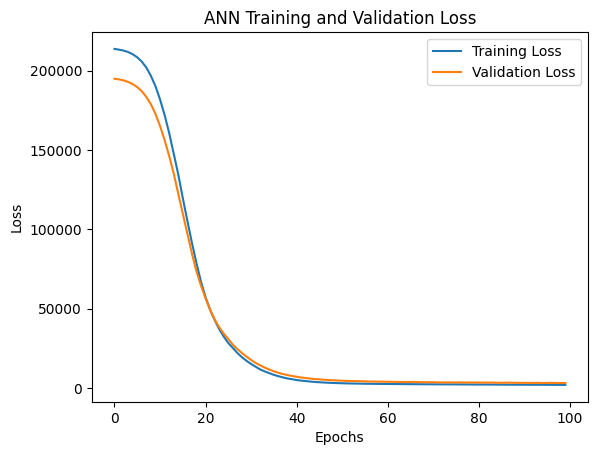

In [ ]:
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SHAP

In [19]:
!pip install shap

In [20]:
# Import SHAP library
import shap
import matplotlib.pyplot as plt

In [21]:
# Ensure the ANN model is trained
# If not already done, make sure the ANN model is trained
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1586.0426 - mae: 29.4585 - val_loss: 2785.7708 - val_mae: 37.4996
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1690.1932 - mae: 28.8303 - val_loss: 2902.3367 - val_mae: 37.6666
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1820.5913 - mae: 29.1608 - val_loss: 2883.1753 - val_mae: 37.4646
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1412.1868 - mae: 27.0033 - val_loss: 2849.4910 - val_mae: 37.2718
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1752.4083 - mae: 29.6190 - val_loss: 2868.7065 - val_mae: 37.1441
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1526.9784 - mae: 28.1958 - val_loss: 2788.3706 - val_mae: 37.0222
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1537.1805 - mae: 28.0372 - val_loss: 2830.7749 - val_mae: 36.9181
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1352.0812 - mae: 27.2431 - val_loss: 2814.7588 - val_mae: 36.7850


In [22]:
# After scaling, create a DataFrame with feature names for the test set
X_test_scaled_df = pd.DataFrame(X_test, columns=[
    "TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
    "CAPITAL_OUTLAY_EXPENDITURE_RATIO"
])

In [23]:
# Initialize the SHAP Explainer with feature names
explainer = shap.Explainer(model, X_test_scaled_df)

In [24]:
# Compute SHAP values for the test set
shap_values = explainer(X_test_scaled_df)

In [29]:
# --- 1. Force Plot (Local Explanation for One Prediction) ---
shap.initjs()  # Initialize JavaScript visualization
single_prediction = 0  # Index of the test sample to explain

# Get the base value (expected value) from the SHAP values
expected_value = shap_values.base_values[0]  # Access the expected value from base_values


shap.force_plot(
    expected_value,
    shap_values.values[single_prediction],  # Access the values using .values
    X_test_scaled_df.iloc[single_prediction]
)

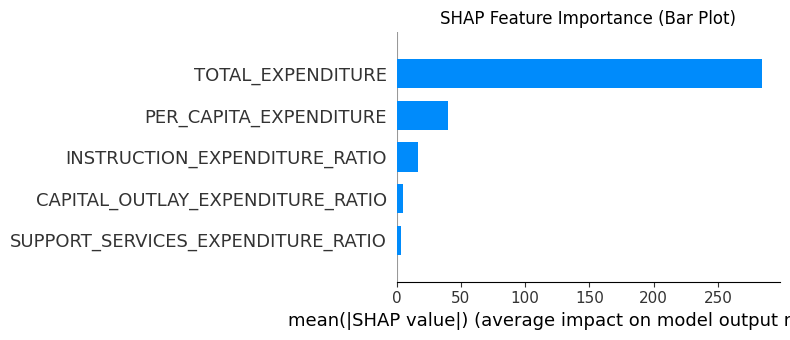

In [30]:
# --- 2. Feature Importance (Global Explanation) ---
# Bar plot of mean absolute SHAP values
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

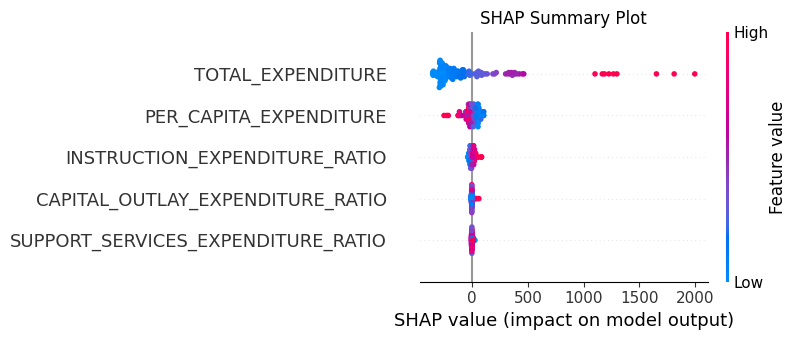

In [31]:
# --- 3. Summary Plot (Global Explanation of Feature Impacts) ---
# Distribution of SHAP values for each feature
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test_scaled_df)